<a href="https://colab.research.google.com/github/chang-heekim/MNIST_CNN/blob/main/Tensorflow_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.
test_images = test_images / 255. 

train_size = int(len(train_images) * 0.9)
val_size = len(train_images) - train_size

dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(1024)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

train_dataset = dataset.take(train_size)
val_dataset= dataset.take(val_size)

train_batch_size = 100
val_batch_size = 10
test_batch_size = 100

train_dataset = train_dataset.batch(train_batch_size, drop_remainder=True)
val_dataset = val_dataset.batch(val_batch_size, drop_remainder=True)
test_dataset = test_dataset.batch(test_batch_size, drop_remainder=True)

In [3]:
for sample_batch in train_dataset:
    print(sample_batch)
    break

(<tf.Tensor: shape=(100, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.

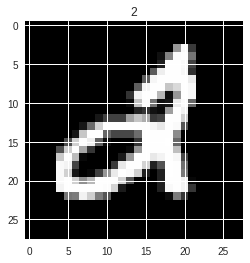

In [4]:
sample = next(iter(train_dataset))
img, label = sample[0][0], sample[1][0]
plt.imshow(img, 'gray')
plt.title(label.numpy())
plt.show()

In [5]:
class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, 3, 1, 'same', activation='relu'),        # B x 28 x 28 x 32
            tf.keras.layers.MaxPool2D(2, 2)                                        # B x 14 x 14 x 32
        ])
        self.conv2 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, 3, 1, 'same', activation='relu'),        # B x 14 x 14 x 64 
            tf.keras.layers.MaxPool2D(2, 2)                                        # B x 7 x 7 x 64
        ])
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(128, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, input):
        x = tf.expand_dims(input, -1)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)

        x = self.fc1(x)
        out = self.fc2(x)
        return out

In [6]:
input_shape = (None, 28, 28)
model = CNN()
model.build(input_shape)
model.summary()
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=1e-3),
    metrics=['accuracy']
)

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 14, 14, 32)        320       
                                                                 
 sequential_1 (Sequential)   (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  401536    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(
    train_dataset, epochs=15, validation_data=val_dataset
)

Epoch 1/15
540/540 [==============================] - 9s 13ms/step - loss: 2.2672 - accuracy: 0.2564 - val_loss: 2.2259 - val_accuracy: 0.3908
Epoch 2/15
540/540 [==============================] - 7s 14ms/step - loss: 2.1612 - accuracy: 0.4913 - val_loss: 2.0657 - val_accuracy: 0.5648
Epoch 3/15
540/540 [==============================] - 7s 14ms/step - loss: 1.8641 - accuracy: 0.6318 - val_loss: 1.5564 - val_accuracy: 0.7010
Epoch 4/15
540/540 [==============================] - 7s 12ms/step - loss: 1.1891 - accuracy: 0.7423 - val_loss: 0.8505 - val_accuracy: 0.7883
Epoch 5/15
540/540 [==============================] - 6s 12ms/step - loss: 0.7143 - accuracy: 0.8130 - val_loss: 0.5784 - val_accuracy: 0.8415
Epoch 6/15
540/540 [==============================] - 6s 12ms/step - loss: 0.5344 - accuracy: 0.8494 - val_loss: 0.4545 - val_accuracy: 0.8737
Epoch 7/15
540/540 [==============================] - 8s 14ms/step - loss: 0.4496 - accuracy: 0.8707 - val_loss: 0.3907 - val_accuracy: 0.8918

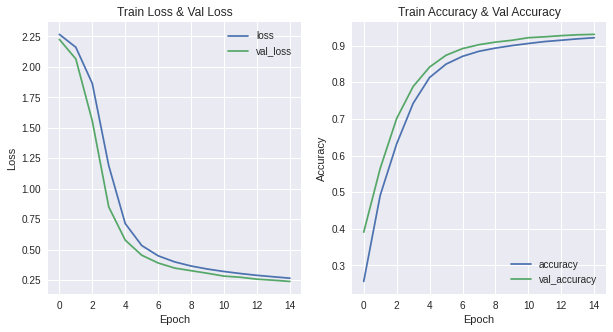

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Train Loss & Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='best')
plt.title('Train Accuracy & Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

100/100 [==============================] - 1s 5ms/step - loss: 0.2460 - accuracy: 0.9298
Test Loss: 0.2459527850151062, Test Accuracy: 0.9297999739646912
